# AI-Compass Benchmarking Analysis (v2 - Hybrid)

This notebook performs the clustering analysis using the **Hybrid ML v2** approach.
It combines K-Means clustering with **dynamic semantic mapping** from the database profiles.

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add root directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))

from data_pipeline import DataPipeline
from models import ClusterEngine

%matplotlib inline

## 1. Load Data
Fetching dimension data and **Cluster Profile** metadata from the database.

In [2]:
dp = DataPipeline()
dfs = dp.fetch_data()

if dfs:
    # create_matrices now returns q_matrix, d_matrix, and profiles
    q_matrix, d_matrix, profiles = dp.create_matrices(dfs)
    print(f"Loaded {len(d_matrix)} companies.")
    print(f"Loaded {len(profiles)} cluster archetypes from database.")
    dimension_cols = list(d_matrix.columns)
else:
    print("Failed to load data.")

Loaded 500 companies.
Loaded 5 cluster archetypes from database.


d:\SpicedProjects\Projects\ai-compass\benchmarking_ai\ml_v2\data_pipeline.py:145: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dim_results = dim_groups.apply(


## 2. Run Hybrid Clustering
Initializing `ClusterEngine` with the `profiles` metadata and enforcing 5 clusters.

In [3]:
clust = ClusterEngine(d_matrix, cluster_profiles=profiles, n_clusters=5)
labels = clust.train()
results = clust.get_results_df()

# Apply Dynamic Labels (Rank-Based Grounding)
cluster_names = clust.get_cluster_labels()
results['Cluster_Name'] = results['Cluster'].map(cluster_names)

print("Hybrid Segments Found:")
print(results['Cluster_Name'].value_counts().sort_index())

Hybrid Segments Found:
Cluster_Name
1 - The Traditionalist            98
2 - The Experimental Explorer    200
3 - The Structured Builder        72
4 - The Operational Scaler        57
5 - The AI-Driven Leader          73
Name: count, dtype: int64


## 3. Visualize Results
Comparing groups on the PCA plane with their strategic names.

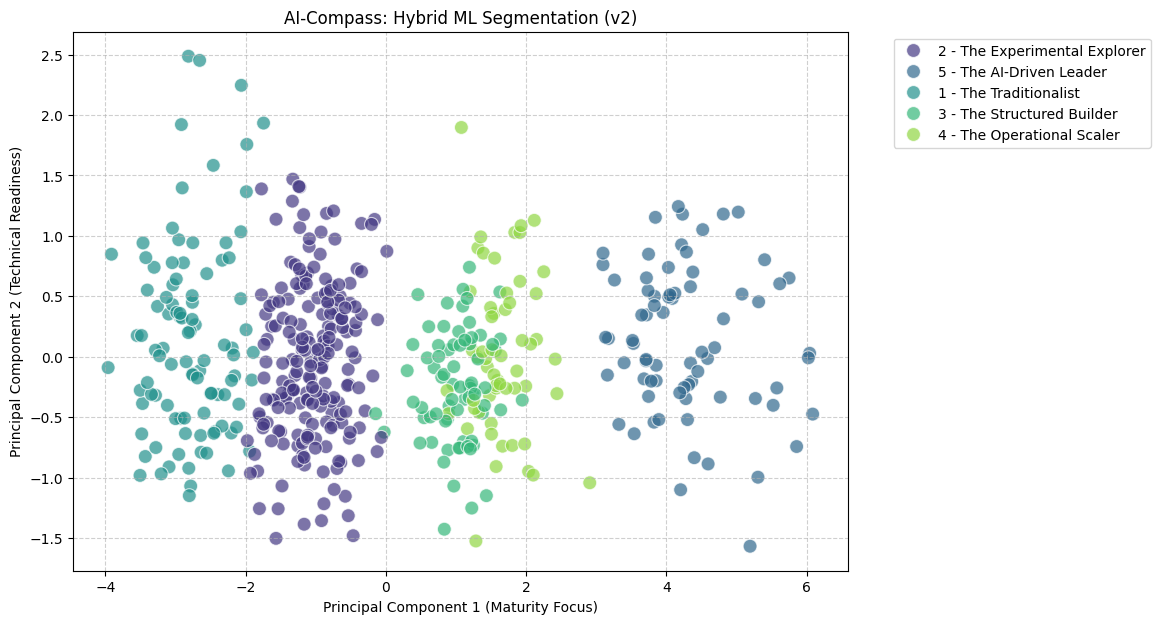

In [4]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=results, 
    x='PCA_X', 
    y='PCA_Y', 
    hue='Cluster_Name', 
    palette='viridis', 
    s=100, 
    alpha=0.7
)
plt.title("AI-Compass: Hybrid ML Segmentation (v2)")
plt.xlabel("Principal Component 1 (Maturity Focus)")
plt.ylabel("Principal Component 2 (Technical Readiness)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 4. Centroid Analysis
Examining the average scores per dimension for each strategic archetype.

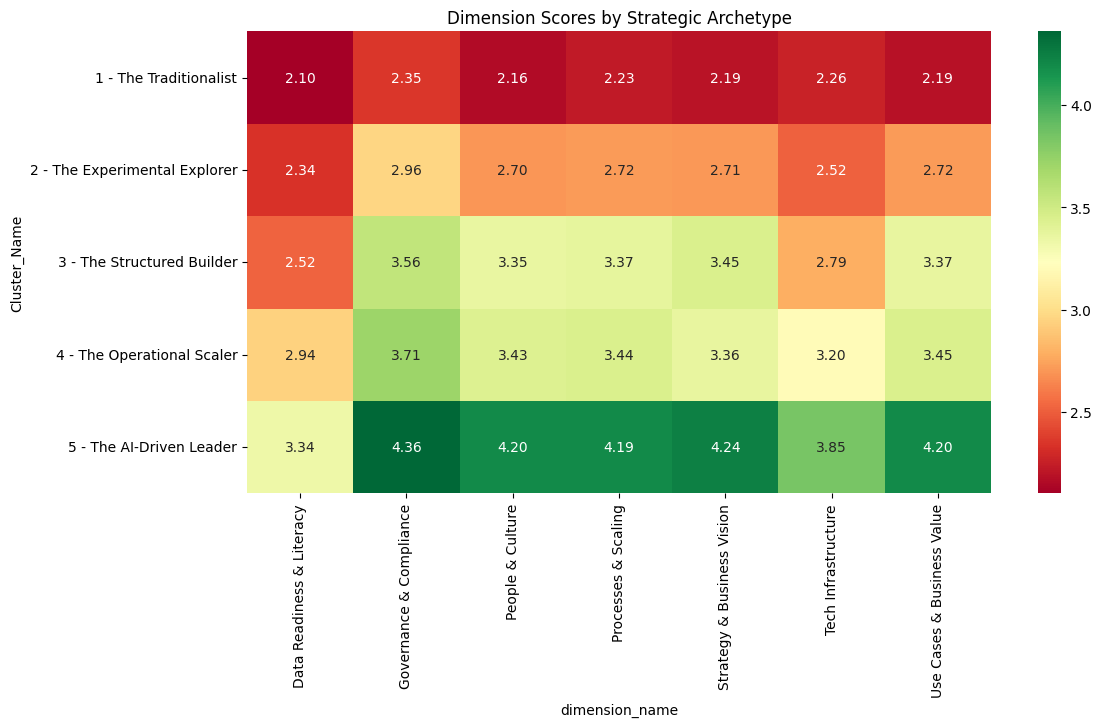

In [5]:
centroids = results.groupby('Cluster_Name')[dimension_cols].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(centroids, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title("Dimension Scores by Strategic Archetype")
plt.show()